In [1]:
from ipynb.fs.full.config_helper import get_agg_config

import warnings
warnings.filterwarnings("ignore")

In [2]:
NUM_OF_PARTIES = 20
ROUNDS = 150
EPOCHS = 3

dataset='femnist'

In [3]:
from ibmfl.aggregator.aggregator import Aggregator

agg_config = get_agg_config(NUM_OF_PARTIES, ROUNDS, EPOCHS)
aggregator = Aggregator(config_dict=agg_config)

aggregator.start()

Yaml configuration file not found: log_config.yaml


2021-06-11T16:25:54.200Z | 1.0.5 | INFO | ibmfl.util.config                                  | Getting Aggregator details from arguments.
2021-06-11T16:25:54.201Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-11T16:25:54.201Z | 1.0.5 | INFO | ibmfl.util.config                                  | No metrics recorder config provided for this setup.
2021-06-11T16:25:54.202Z | 1.0.5 | INFO | ibmfl.util.config                                  | No model config provided for this setup.
2021-06-11T16:25:54.581Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-11T16:25:54.582Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | RestSender initialized
2021-06-11T16:25:54.583Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.START
2021-06-11T16:25:54.583Z | 1.0.5 | INFO | ibmfl.connection.flask_connection 

2021-06-11T16:27:00.697Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-11T16:27:00.699Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party13
2021-06-11T16:27:00.700Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:13
2021-06-11T16:27:00.701Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:27:00] "POST /6 HTTP/1.1" 200 -
2021-06-11T16:27:05.069Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-11T16:27:05.070Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party14
2021-06-11T16:27:05.071Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:14
2021-06-11T16:27:05.072Z | 1.0.5 | INFO | werkzeug                               

In [4]:
eval_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
eval_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
train_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
train_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
iterations = [[] for _ in range(NUM_OF_PARTIES)]

def get_metrics(metrics):
    keys = list(metrics['party'].keys())
    keys.sort()
    for i in range(len(keys)):
        eval_party_acc[i].append(metrics['party'][keys[i]]['test']['acc'])
        eval_party_loss[i].append(metrics['party'][keys[i]]['test']['loss'])
        train_party_acc[i].extend(metrics['party'][keys[i]]['train']['acc'])
        train_party_loss[i].extend(metrics['party'][keys[i]]['train']['loss'])
        iterations[i].append(metrics['fusion']['curr_round']*agg_config['hyperparams']['local']['training']['epochs'])

mh = aggregator.fusion.metrics_manager
mh.register(get_metrics)


aggregator.start_training()

2021-06-11T16:27:39.334Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating Global Training.
2021-06-11T16:27:39.335Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Warm start disabled.
2021-06-11T16:27:39.336Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model updateNone
2021-06-11T16:27:39.337Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T16:27:39.337Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T16:27:40.046Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T16:27:40.047Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T16:27:40.047Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T16:27:40.048

2021-06-11T16:29:04.274Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:29:04] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:29:04.314Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:29:04] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:29:04.359Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:29:04] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:29:05.158Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:85
2021-06-11T16:29:05.159Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T16:29:05.159Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T16:29:05.160Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T16:29:05.233Z | 1.0.5 | IN

2021-06-11T16:29:46.961Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:29:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:29:47.762Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T16:29:47.763Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T16:29:47.763Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T16:29:47.764Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T16:29:47.804Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5bfe090c18>
2021-06-11T16:29:47.805Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T16:29:47.806Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-11T16:30:29.880Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T16:30:29.880Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T16:30:29.923Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5bfddcd208>
2021-06-11T16:30:29.923Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T16:30:29.924Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T16:30:32.380Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T16:30:32.397Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T16:30:32.399Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-11T16:31:12.670Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T16:31:12.671Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T16:31:16.135Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T16:31:16.142Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T16:31:16.143Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T16:31:16.145Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T16:31:21.150Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T16:31:26.158Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11

2021-06-11T16:31:58.842Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T16:31:58.844Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T16:31:58.845Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T16:32:03.850Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T16:32:08.855Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T16:32:13.858Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T16:32:18.862Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T16:32:23.870Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T16:32:28

2021-06-11T16:32:46.234Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T16:32:51.251Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T16:32:56.265Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T16:33:01.274Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T16:33:06.279Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T16:33:11.288Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T16:33:16.306Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T16:33:17.879Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:33:18.159

2021-06-11T16:33:43.570Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T16:33:48.574Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T16:33:53.578Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T16:33:58.584Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T16:33:59.254Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:33:59.637Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:33:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:34:00.639Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:34:00.782Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - 

2021-06-11T16:34:37.708Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:34:38.238Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:34:38] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:34:38.239Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:34:38.715Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:34:38] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:34:40.097Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:34:40.614Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:34:40] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:34:41.133Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:34:41.471Z | 1.0.5 

2021-06-11T16:35:22.764Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:35:22.951Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:35:22] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:35:23.297Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:35:23] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:35:24.141Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:35:24.644Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:35:24] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:35:24.658Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:35:24.848Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T16:35:24.870Z | 1.0.5 | 

2021-06-11T16:36:08.177Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:36:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:36:10.246Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:36:10.329Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:36:10] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:36:10.330Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:36:10.362Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:36:10.370Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:36:10.373Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:36:10.419Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T16:36:52.178Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:36:52.194Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:36:52.210Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:36:52.214Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:36:52.217Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:36:52.256Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:36:52] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:36:52.257Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:36:52.272Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-11T16:37:35.046Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:37:35.049Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:37:35.117Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:37:35] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:37:35.118Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:37:35.133Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:37:35.170Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:37:35] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:37:35.191Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:37:35.193Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T16:38:18.157Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:38:18] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:38:18.211Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:38:18.212Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:38:18] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:38:18.212Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:38:18] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:38:18.213Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:38:18.248Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:38:18.249Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:38:18] "POST /7 HTTP/1.1" 200 -


2021-06-11T16:39:00.395Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:39:00.396Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:39:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:39:00.397Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:39:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:39:00.410Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:39:00.432Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:39:00.433Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:39:00.469Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:39:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:39:00.471Z | 1.0.5 

2021-06-11T16:39:43.120Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:39:43.122Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:39:43.200Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:39:43] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:39:43.235Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:39:43.236Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:39:43] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:39:43.237Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:39:43] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:39:43.238Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:39:43.272Z | 1.0.5 

2021-06-11T16:40:25.521Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:40:25.558Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:40:25.559Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:40:25] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:40:25.561Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:40:25.596Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:40:25.596Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:40:25.597Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:40:25] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:40:25.598Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T16:41:08.293Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:41:08.293Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:41:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:41:08.295Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:41:08.296Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:41:08.310Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:41:08.331Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:41:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:41:08.373Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:41:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:41:08.441Z | 1.0.5 

2021-06-11T16:41:51.216Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:41:51] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:41:51.217Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:41:51.258Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:41:51] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:41:51.298Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:41:51] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:41:51.367Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:41:51] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:41:51.368Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:41:51] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:41:51.435Z | 1.0.5 | INFO | werkzeug                                         

2021-06-11T16:42:32.877Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:42:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:42:32.912Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:42:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:42:32.946Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:42:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:42:32.980Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:42:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:42:33.017Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:42:33] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:42:33.055Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:42:33] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:42:33.089Z | 1.0.5 | INFO | werkzeug        

2021-06-11T16:43:15.355Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:43:15] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:43:15.405Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:43:15] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:43:15.427Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:43:15] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:43:15.461Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:43:15] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:43:15.498Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:43:15] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:43:15.532Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:43:15] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:43:15.569Z | 1.0.5 | INFO | werkzeug        

2021-06-11T16:43:59.134Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:43:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:43:59.168Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:43:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:43:59.203Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:43:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:43:59.240Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:43:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:43:59.275Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:43:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:44:00.879Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T16:44:00.879Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-11T16:44:41.577Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:44:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:44:41.578Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:44:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:44:41.579Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:44:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:44:43.269Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T16:44:43.270Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T16:44:43.270Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T16:44:43.271Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T16:44:43.307Z | 1.0.5 | IN

2021-06-11T16:45:24.471Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:45:24] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:45:25.701Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T16:45:25.702Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T16:45:25.702Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T16:45:25.703Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T16:45:25.744Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5bfddbdfd0>
2021-06-11T16:45:25.745Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T16:45:25.746Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-11T16:46:08.422Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T16:46:08.423Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T16:46:08.463Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5bfd4d95c0>
2021-06-11T16:46:08.464Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T16:46:08.465Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T16:46:11.398Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T16:46:11.405Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T16:46:11.407Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-11T16:46:51.830Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T16:46:51.831Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T16:46:54.036Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T16:46:54.047Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T16:46:54.058Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T16:46:54.072Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T16:46:59.082Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T16:47:04.090Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11

2021-06-11T16:47:36.358Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T16:47:36.367Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T16:47:36.369Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T16:47:41.385Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T16:47:46.390Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T16:47:51.394Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T16:47:56.402Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T16:48:01.410Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T16:48:06

2021-06-11T16:48:24.118Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T16:48:29.126Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T16:48:34.134Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T16:48:39.150Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T16:48:44.154Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T16:48:49.161Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T16:48:49.343Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:48:49.773Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:48:49] "POST /7 HTTP

2021-06-11T16:49:21.462Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T16:49:26.470Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T16:49:31.474Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T16:49:35.231Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:49:35.814Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:49:35] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:49:36.481Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T16:49:36.974Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:49:37.280Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - 

2021-06-11T16:50:18.858Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T16:50:20.682Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:50:20.948Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:50:20] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:50:21.337Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:50:21.428Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:50:21] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:50:21.802Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:50:21.881Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:50:21] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:50:21.882Z | 1.0.5 | 

2021-06-11T16:51:04.138Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:51:04.237Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:51:04] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:51:04.238Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:51:04.248Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:51:04.274Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:51:04.302Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:51:04.318Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:51:04.410Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-11T16:51:44.718Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:51:44] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:51:45.514Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:51:45.609Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:51:45] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:51:45.854Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:51:45.928Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:51:45.950Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:51:45] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:51:46.011Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:51:46.012Z | 1.0.5 

2021-06-11T16:52:28.689Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:52:28.691Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:52:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:52:28.736Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:52:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:52:28.769Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:52:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:52:28.886Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:52:28.927Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:52:28.930Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:52:28.968Z | 1.0.5 

2021-06-11T16:53:11.593Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:53:11.597Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:53:11.605Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:53:11.609Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:53:11.615Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:53:11.619Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:53:11.622Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:53:11.629Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-

2021-06-11T16:53:54.807Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:53:54.808Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:53:54] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:53:54.809Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:53:54.822Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:53:54.843Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:53:54.844Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:53:54] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:53:54.846Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:53:54.846Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T16:54:37.237Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:54:37.238Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:54:37] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:54:37.238Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:54:37.271Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:54:37.272Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:54:37] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:54:37.286Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:54:37.307Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:54:37] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:54:37.308Z | 1.0.5 

2021-06-11T16:55:19.943Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:55:19.965Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:55:19.966Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:55:19] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:55:20.000Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:55:20.001Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:55:20] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:55:20.002Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:55:20.004Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:55:20.038Z | 1.0.5 | INFO | werkzeug                

2021-06-11T16:56:03.040Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:56:03.042Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:56:03.056Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:56:03.077Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:56:03] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:56:03.078Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:56:03.080Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:56:03.081Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:56:03.082Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-11T16:56:45.256Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:56:45.277Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:56:45] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:56:45.279Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:56:45.279Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:56:45.280Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:56:45.294Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:56:45.318Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:56:45] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:56:45.355Z | 1.0.5 | INFO | werkzeug                

2021-06-11T16:57:27.505Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:57:27.506Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:57:27.554Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:57:27] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:57:27.576Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:57:27] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:57:27.616Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:57:27] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:57:27.651Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:57:27] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:57:27.692Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16

2021-06-11T16:58:11.068Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:58:11.069Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T16:58:11.105Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:58:11] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:58:11.144Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:58:11] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:58:11.215Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:58:11] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:58:11.217Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:58:11] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:58:11.283Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16

2021-06-11T16:58:52.435Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:58:52] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:58:52.436Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:58:52] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:58:52.503Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:58:52] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:58:52.504Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:58:52] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:58:52.558Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:58:52] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:58:52.580Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:58:52] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:58:52.626Z | 1.0.5 | INFO | werkzeug        

2021-06-11T16:59:35.171Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:59:35] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:59:35.172Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:59:35] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:59:35.208Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:59:35] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:59:35.277Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:59:35] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:59:35.279Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:59:35] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:59:35.317Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 16:59:35] "POST /7 HTTP/1.1" 200 -
2021-06-11T16:59:35.352Z | 1.0.5 | INFO | werkzeug        

2021-06-11T17:00:17.123Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:00:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:00:17.161Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:00:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:00:17.198Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:00:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:00:17.233Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:00:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:00:17.266Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:00:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:00:19.730Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T17:00:19.731Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-11T17:01:00.862Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:01:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:01:00.944Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:01:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:01:00.945Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:01:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:01:02.018Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T17:01:02.019Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T17:01:02.019Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T17:01:02.020Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T17:01:02.058Z | 1.0.5 | IN

2021-06-11T17:01:42.548Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:01:42] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:01:45.062Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T17:01:45.063Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T17:01:45.064Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T17:01:45.065Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T17:01:45.106Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5c1ee88ba8>
2021-06-11T17:01:45.107Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T17:01:45.108Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-11T17:02:27.659Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T17:02:27.659Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T17:02:27.706Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5bfdd79be0>
2021-06-11T17:02:27.707Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T17:02:27.708Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T17:02:30.403Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T17:02:30.405Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T17:02:30.406Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-11T17:03:10.545Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T17:03:10.546Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T17:03:13.379Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T17:03:13.385Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T17:03:13.386Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T17:03:13.387Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T17:03:18.393Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T17:03:23.403Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11

2021-06-11T17:03:55.811Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T17:03:55.812Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T17:03:55.813Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T17:04:00.818Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T17:04:05.822Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T17:04:10.827Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T17:04:15.838Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T17:04:20.845Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T17:04:25

2021-06-11T17:04:43.654Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T17:04:48.658Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T17:04:53.664Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T17:04:58.669Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T17:05:03.674Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T17:05:08.559Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:05:08.679Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T17:05:09.383Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:05:09.7

2021-06-11T17:05:41.130Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T17:05:46.137Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T17:05:51.142Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T17:05:55.105Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:05:55.621Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:05:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:05:55.624Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:05:56.202Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T17:05:56.204Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - 

2021-06-11T17:06:33.853Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:06:34.438Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:06:34] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:06:38.168Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:06:38.794Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T17:06:38.804Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:06:38] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:06:39.275Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:06:39.623Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:06:39] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:06:39.625Z | 1.0.5 | 

2021-06-11T17:07:19.872Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:07:19] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:07:20.263Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:07:20] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:07:20.751Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:07:20] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:07:20.881Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:07:21.381Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:07:21] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:07:21.614Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T17:07:23.798Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
20

2021-06-11T17:08:07.154Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:08:07.170Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:08:07.263Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:08:07] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:08:07.264Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:08:07.285Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:08:07] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:08:07.286Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:08:07.313Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:08:07.334Z | 1.0.5 | INFO | werkzeug                

2021-06-11T17:08:49.523Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:08:49] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:08:49.524Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:08:49.536Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:08:49.554Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:08:49.558Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:08:49.562Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:08:49.588Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:08:49.610Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-11T17:09:31.766Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:09:31.790Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:09:31.793Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:09:31.852Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:09:31.853Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:09:31] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:09:31.904Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:09:31] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:09:31.906Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:09:31.928Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T17:10:15.278Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:10:15.279Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:10:15] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:10:15.282Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:10:15.288Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:10:15.292Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:10:15.321Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:10:15.395Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:10:15] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:10:15.396Z | 1.0.5 | INFO | werkzeug                

2021-06-11T17:10:57.658Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:10:57.660Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:10:57.696Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:10:57.696Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:10:57] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:10:57.697Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:10:57.711Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:10:57.732Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:10:57] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:10:57.733Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T17:11:40.465Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:11:40] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:11:40.513Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:11:40] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:11:40.535Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:11:40] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:11:40.537Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:11:40.538Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:11:40.604Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:11:40] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:11:40.606Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17

2021-06-11T17:12:22.516Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:12:22.517Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:12:22.518Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:12:22.520Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:12:22.521Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:12:22.523Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:12:22.524Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:12:22.562Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:12:22] 

2021-06-11T17:13:05.587Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:13:05.588Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:13:05.589Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:13:05.591Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:13:05.627Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:13:05] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:13:05.628Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:13:05.670Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:13:05] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:13:05.748Z | 1.0.5 | INFO | werkzeug                

2021-06-11T17:13:48.052Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:13:48] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:13:48.107Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:13:48] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:13:48.107Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:13:48] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:13:48.109Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:13:48.111Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:13:48.113Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:13:48.147Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:13:48] "POST /7 HTTP/1.1" 200 -


2021-06-11T17:14:30.282Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:14:30] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:14:30.348Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:14:30] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:14:30.368Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:14:30] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:14:30.394Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:14:30] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:14:30.436Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:14:30] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:14:30.450Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:14:30] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:14:30.470Z | 1.0.5 | INFO | werkzeug        

2021-06-11T17:15:13.903Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:15:13] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:15:13.970Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:15:13] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:15:13.972Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:15:13] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:15:14.023Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:15:14] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:15:14.044Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:15:14] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:15:14.112Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:15:14] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:15:14.113Z | 1.0.5 | INFO | werkzeug        

2021-06-11T17:15:56.500Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:15:56] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:15:56.500Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:15:56] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:15:56.550Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:15:56] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:15:56.571Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:15:56] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:15:56.606Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:15:56] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:15:56.641Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:15:56] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:15:57.576Z | 1.0.5 | INFO | ibmfl.aggregator

2021-06-11T17:16:38.390Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:16:38] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:16:38.426Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:16:38] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:16:38.493Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:16:38] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:16:38.494Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:16:38] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:16:40.182Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T17:16:40.183Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T17:16:40.184Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-11T17:17:21.045Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:17:21] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:17:21.082Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:17:21] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:17:22.837Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T17:17:22.838Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T17:17:22.839Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T17:17:22.839Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T17:17:22.877Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5bec53b6a0>
2021-06-11T17:17:22.878

2021-06-11T17:18:06.168Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T17:18:06.168Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T17:18:06.169Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T17:18:06.169Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T17:18:06.206Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5c1d3c2518>
2021-06-11T17:18:06.206Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T17:18:06.207Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T17:18:09.003Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-11T17:18:49.045Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T17:18:49.082Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5bfddcd208>
2021-06-11T17:18:49.082Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T17:18:49.083Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T17:18:51.255Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T17:18:51.257Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T17:18:51.259Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T17:18:51.260Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-11T17:19:31.369Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T17:19:34.281Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T17:19:34.284Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T17:19:34.285Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T17:19:34.287Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T17:19:39.298Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T17:19:44.305Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T17:19:49.311Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T17

2021-06-11T17:20:17.991Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T17:20:17.992Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T17:20:22.998Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T17:20:28.002Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T17:20:33.014Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T17:20:38.031Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T17:20:43.041Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T17:20:48.046Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T17:20:49.2

2021-06-11T17:21:10.331Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T17:21:15.342Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T17:21:20.346Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T17:21:25.354Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T17:21:30.360Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T17:21:32.945Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:21:34.002Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:21:34] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:21:35.366Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 T

2021-06-11T17:22:07.774Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T17:22:12.778Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T17:22:17.782Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T17:22:19.168Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:22:19.319Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:22:19.327Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:22:19] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:22:19.371Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:22:19.627Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 

2021-06-11T17:22:55.836Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:22:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:22:58.186Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:22:58.999Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:22:58] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:22:59.884Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:23:00.373Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:23:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:23:00.816Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T17:23:00.883Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:23:01.283Z | 1.0.5 | 

2021-06-11T17:23:44.097Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:23:44] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:23:44.120Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:23:44.495Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:23:44] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:23:45.654Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:23:45.753Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:23:45] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:23:46.017Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:23:46.105Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:23:46] "POST /7 HTTP/1.1" 200 -


2021-06-11T17:24:28.854Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:24:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:24:28.868Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:24:28.890Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:24:28.892Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:24:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:24:28.893Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:24:28.909Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:24:28.952Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:24:28.953Z | 1.0.5 | INFO | werkzeug                

2021-06-11T17:25:07.954Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:25:07] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:25:08.715Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:25:09.048Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:25:09] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:25:09.554Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T17:25:10.702Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:25:10.709Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:25:10.713Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:25:10.721Z | 1.0.5 | INFO | ibmfl.connection.flask_con

2021-06-11T17:25:55.111Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:25:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:25:55.134Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:25:55.150Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:25:55.173Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:25:55.195Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:25:55] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:25:55.196Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:25:55.197Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:25:55.232Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T17:26:37.202Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:26:37] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:26:37.216Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:26:37.239Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:26:37] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:26:37.241Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:26:37.242Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:26:37.243Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:26:37.244Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:26:37.245Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T17:27:21.123Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:27:21] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:27:21.148Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:27:21] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:27:21.149Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:27:21.150Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:27:21.152Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:27:21.154Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:27:21.155Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:27:21.156Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T17:28:03.570Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:28:03.585Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:28:03.586Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:28:03.621Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:28:03.655Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:28:03] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:28:03.669Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:28:03] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:28:03.703Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:28:03] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:28:03.704Z | 1.0.5 

2021-06-11T17:28:46.025Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:28:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:28:46.038Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:28:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:28:46.060Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:28:46.060Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:28:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:28:46.062Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:28:46.064Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:28:46.065Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:28:46.067Z | 1.0.5 

2021-06-11T17:29:28.158Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:29:28.159Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:29:28.160Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:29:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:29:28.164Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:29:28.200Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:29:28.201Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:29:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:29:28.202Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:29:28.236Z | 1.0.5 | INFO | werkzeug                

2021-06-11T17:30:11.980Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:30:11] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:30:12.015Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:30:12] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:30:12.088Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:30:12] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:30:12.088Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:30:12] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:30:12.157Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:30:12] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:30:12.158Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:30:12] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:30:12.194Z | 1.0.5 | INFO | werkzeug        

2021-06-11T17:30:53.426Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:30:53.426Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:30:53.484Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:30:53] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:30:53.540Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:30:53] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:30:53.541Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:30:53] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:30:53.608Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:30:53] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:30:53.609Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17

2021-06-11T17:31:36.759Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:31:36] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:31:36.839Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:31:36] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:31:36.862Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:31:36] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:31:36.862Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:31:36] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:31:36.932Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:31:36] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:31:36.933Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:31:36] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:31:36.972Z | 1.0.5 | INFO | werkzeug        

2021-06-11T17:32:19.965Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:32:19] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:32:19.986Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:32:19] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:32:20.026Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:32:20] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:32:20.064Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:32:20] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:32:20.131Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:32:20] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:32:20.132Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:32:20] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:32:21.933Z | 1.0.5 | INFO | ibmfl.aggregator

2021-06-11T17:33:02.381Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:33:02] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:33:02.453Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:33:02] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:33:02.454Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:33:02] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:33:02.488Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:33:02] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:33:05.042Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T17:33:05.043Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T17:33:05.044Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-11T17:33:46.455Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:33:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:33:46.507Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:33:46] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:33:47.165Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T17:33:47.165Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T17:33:47.166Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T17:33:47.167Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T17:33:47.205Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5c1c11a9b0>
2021-06-11T17:33:47.206

2021-06-11T17:34:30.229Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T17:34:30.230Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T17:34:30.230Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T17:34:30.231Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T17:34:30.267Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5bfd4dda90>
2021-06-11T17:34:30.268Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T17:34:30.269Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T17:34:32.974Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-11T17:35:13.088Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T17:35:13.126Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5c1e5d8400>
2021-06-11T17:35:13.127Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T17:35:13.127Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T17:35:15.528Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T17:35:15.531Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T17:35:15.532Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T17:35:15.534Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-11T17:35:55.934Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T17:35:58.378Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T17:35:58.394Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T17:35:58.396Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T17:35:58.398Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T17:36:03.402Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T17:36:08.406Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T17:36:13.410Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T17

2021-06-11T17:36:40.818Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T17:36:40.826Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T17:36:45.834Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T17:36:50.838Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T17:36:55.846Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T17:37:00.850Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T17:37:05.854Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T17:37:10.858Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T17:37:13.0

2021-06-11T17:37:33.399Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T17:37:38.402Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T17:37:43.410Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T17:37:48.422Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T17:37:53.437Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T17:37:57.365Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:37:57.960Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:37:57] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:37:58.442Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 T

2021-06-11T17:38:30.902Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T17:38:35.914Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T17:38:39.076Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:38:40.005Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:38:40] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:38:40.009Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:38:40.290Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:38:40] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:38:40.307Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:38:40.924Z | 1.0.5 | INFO | ibmfl.aggregator.protohandle

2021-06-11T17:39:26.079Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:39:26.185Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:39:26] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:39:26.330Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:39:26.428Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:39:26.429Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:39:26] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:39:26.500Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:39:26.501Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:39:26] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:39:26.517Z | 1.0.5 

2021-06-11T17:40:05.989Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:40:06.200Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T17:40:06.544Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:40:06] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:40:06.758Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:40:07.130Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:40:07] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:40:08.386Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:40:08.438Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:40:08.481Z | 1.0.5 | INFO | werkzeug                  

2021-06-11T17:40:51.414Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:40:51.442Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:40:51.447Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:40:51.450Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:40:51.509Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:40:51.510Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:40:51] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:40:51.511Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:40:51.533Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-11T17:41:32.192Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:41:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:41:33.314Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:41:33.381Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:41:33] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:41:33.598Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:41:33.684Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:41:33] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:41:33.742Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:41:33.754Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:41:33.757Z | 1.0.5 

2021-06-11T17:42:17.456Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:42:17.478Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:42:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:42:17.500Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:42:17.567Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:42:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:42:17.568Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:42:17.569Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:42:17] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:42:17.571Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:42:17.585Z | 1.0.5 

2021-06-11T17:43:00.140Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:43:00.159Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:43:00.196Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:43:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:43:00.217Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:43:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:43:00.239Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:43:00.286Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:43:00] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:43:00.309Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:43:00] "POST /7 HTTP/1.1" 200 -


2021-06-11T17:43:43.169Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:43:43.190Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:43:43] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:43:43.191Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:43:43.193Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:43:43.195Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:43:43.243Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:43:43] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:43:43.245Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:43:43.267Z | 1.0.5 | INFO | werkzeug                

2021-06-11T17:44:24.978Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:44:24.980Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:44:24.983Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:44:24.984Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:44:25.054Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:44:25.055Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:44:25] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:44:25.056Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:44:25] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:44:25.057Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T17:45:07.910Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:45:07.924Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:45:07.946Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:45:07] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:45:07.947Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:45:07.948Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:45:07.950Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:45:07.950Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:45:07.952Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-11T17:45:51.419Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:45:51.420Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:45:51] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:45:51.473Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:45:51] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:45:51.474Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:45:51] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:45:51.475Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:45:51.475Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:45:51.476Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:45:51.511Z | 1.0.5 

2021-06-11T17:46:33.534Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:46:33.535Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:46:33] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:46:33.557Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:46:33] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:46:33.558Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:46:33.560Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:46:33.560Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:46:33.595Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:46:33] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:46:33.640Z | 1.0.5 

2021-06-11T17:47:16.498Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:47:16] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:47:16.536Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:47:16] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:47:16.585Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:47:16] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:47:16.608Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:47:16] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:47:16.684Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:47:16] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:47:16.685Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:47:16] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:47:16.720Z | 1.0.5 | INFO | werkzeug        

2021-06-11T17:47:58.861Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:47:58.898Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:47:58] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:47:58.939Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:47:58] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:47:59.012Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:47:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:47:59.045Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:47:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:47:59.045Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:47:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:47:59.081Z | 1.0.5 | INFO | werkzeug                                         

2021-06-11T17:48:41.487Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:48:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:48:41.521Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:48:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:48:41.544Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:48:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:48:41.577Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:48:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:48:41.614Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:48:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:48:41.649Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:48:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:48:44.088Z | 1.0.5 | INFO | ibmfl.aggregator

2021-06-11T17:49:24.545Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:49:24] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:49:24.579Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:49:24] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:49:24.650Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:49:24] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:49:24.652Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:49:24] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:49:26.581Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T17:49:26.582Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T17:49:26.583Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-11T17:50:07.648Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:50:07] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:50:07.685Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:50:07] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:50:09.332Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T17:50:09.333Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T17:50:09.334Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T17:50:09.334Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T17:50:09.372Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5bfdd870f0>
2021-06-11T17:50:09.373

2021-06-11T17:50:52.931Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T17:50:52.932Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T17:50:52.933Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T17:50:52.933Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T17:50:52.970Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5c1d287358>
2021-06-11T17:50:52.970Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T17:50:52.971Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T17:50:55.642Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-11T17:51:35.908Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T17:51:35.947Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5bfdd87358>
2021-06-11T17:51:35.948Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T17:51:35.948Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T17:51:38.106Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T17:51:38.107Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T17:51:38.108Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T17:51:38.110Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-11T17:52:18.471Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T17:52:22.059Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T17:52:22.060Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T17:52:22.060Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T17:52:22.061Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T17:52:27.066Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T17:52:32.070Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T17:52:37.074Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T17

2021-06-11T17:53:04.920Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T17:53:04.921Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T17:53:09.926Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T17:53:14.930Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T17:53:19.946Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T17:53:24.952Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T17:53:29.958Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T17:53:34.966Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T17:53:37.1

2021-06-11T17:53:58.362Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T17:54:03.366Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T17:54:08.370Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T17:54:13.402Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T17:54:18.413Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T17:54:20.612Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:54:21.236Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:54:21] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:54:21.237Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request receiv

2021-06-11T17:54:55.474Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T17:55:00.478Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T17:55:05.490Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T17:55:07.665Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:55:07.766Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:55:07.835Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:55:07] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:55:07.915Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:55:07] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:55:08.325Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-11T17:55:47.765Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:55:47] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:55:47.922Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-11T17:55:50.321Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:55:50.443Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:55:50] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:55:50.966Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:55:51.002Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:55:51.041Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:55:51] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:55:51.043Z | 1.0.5 | 

2021-06-11T17:56:32.789Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:56:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:56:33.046Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:56:33.070Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:56:33.086Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:56:33.106Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:56:33.140Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:56:33.142Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:56:33] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:56:33.210Z | 1.0.5 | INFO | werkzeug                

2021-06-11T17:57:14.054Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:57:14.328Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:57:14] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:57:14.793Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:57:14.910Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:57:14] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:57:15.418Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:57:15.438Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:57:15.460Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:57:15.519Z | 1.0.5 | INFO | werkzeug                

2021-06-11T17:57:58.747Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:57:58.751Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:57:58.754Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:57:58.757Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:57:58.760Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:57:58.797Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:57:58] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:57:58.811Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:57:58.865Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-11T17:58:40.934Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:58:40.977Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:58:40] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:58:40.981Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:58:40.989Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:58:41.005Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:58:41.026Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:58:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:58:41.055Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:58:41.078Z | 1.0.5 | INFO | werkzeug                

2021-06-11T17:59:24.208Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:59:24.213Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:59:24.271Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:59:24.273Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:59:24] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:59:24.274Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:59:24.288Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T17:59:24.310Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 17:59:24] "POST /7 HTTP/1.1" 200 -
2021-06-11T17:59:24.311Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-11T18:00:07.452Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:00:07.455Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:00:07.456Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:00:07.495Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:00:07] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:00:07.496Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:00:07.532Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:00:07.533Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:00:07.534Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-11T18:00:50.188Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:00:50.190Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:00:50.191Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:00:50.206Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:00:50.229Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:00:50.230Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:00:50] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:00:50.231Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:00:50.232Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-11T18:01:32.319Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:01:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:01:32.320Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:01:32.400Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:01:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:01:32.413Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:01:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:01:32.466Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:01:32.467Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:01:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:01:32.487Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18

2021-06-11T18:02:16.563Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:02:16] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:02:16.564Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:02:16.599Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:02:16] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:02:16.600Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:02:16.613Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:02:16.634Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:02:16] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:02:16.635Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:02:16.708Z | 1.0.5 

2021-06-11T18:02:59.570Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:02:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:02:59.584Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:02:59.606Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:02:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:02:59.641Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:02:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:02:59.676Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:02:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:02:59.715Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:02:59] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:02:59.768Z | 1.0.5 | INFO | werkzeug                                         

2021-06-11T18:03:41.887Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:03:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:03:41.913Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:03:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:03:41.965Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:03:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:03:41.988Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:03:41] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:03:42.026Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:03:42] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:03:42.075Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:03:42] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:03:42.096Z | 1.0.5 | INFO | werkzeug        

2021-06-11T18:04:23.733Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:04:23] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:04:23.734Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:04:23] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:04:23.843Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:04:23] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:04:23.844Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:04:23] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:04:23.845Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:04:23] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:04:23.880Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:04:23] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:04:23.918Z | 1.0.5 | INFO | werkzeug        

2021-06-11T18:05:06.665Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:05:06] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:05:06.714Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:05:06] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:05:06.735Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:05:06] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:05:06.782Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:05:06] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:05:06.821Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:05:06] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:05:06.855Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:05:06] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:05:09.265Z | 1.0.5 | INFO | ibmfl.aggregator

2021-06-11T18:05:50.216Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:05:50] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:05:50.287Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:05:50] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:05:50.289Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:05:50] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:05:50.327Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:05:50] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:05:51.793Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T18:05:51.794Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T18:05:51.794Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-11T18:06:32.482Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:06:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:06:32.518Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:06:32] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:06:34.594Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T18:06:34.594Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T18:06:34.595Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T18:06:34.595Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T18:06:34.631Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5bfdd828d0>
2021-06-11T18:06:34.632

2021-06-11T18:07:16.699Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-11T18:07:16.700Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-11T18:07:16.700Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-11T18:07:16.701Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T18:07:16.738Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5bfd4051d0>
2021-06-11T18:07:16.738Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T18:07:16.739Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T18:07:19.709Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-11T18:07:59.872Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-11T18:07:59.912Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f5bfdd79f28>
2021-06-11T18:07:59.913Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-11T18:07:59.914Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T18:08:03.073Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T18:08:03.075Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T18:08:03.076Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T18:08:03.077Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-11T18:08:43.397Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T18:08:46.023Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T18:08:46.032Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T18:08:46.036Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T18:08:46.044Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T18:08:51.050Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T18:08:56.054Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T18:09:01.080Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T18

2021-06-11T18:09:28.759Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T18:09:28.760Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-11T18:09:33.766Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-11T18:09:38.770Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T18:09:43.774Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T18:09:48.782Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T18:09:53.800Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T18:09:58.810Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T18:09:59.9

2021-06-11T18:10:21.098Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-11T18:10:26.102Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-11T18:10:31.106Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-11T18:10:36.113Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T18:10:41.118Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T18:10:45.093Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:10:45.728Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:10:45] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:10:46.122Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 T

2021-06-11T18:11:18.971Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-11T18:11:23.987Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-11T18:11:27.249Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:11:27.901Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:11:27] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:11:28.156Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:11:28.664Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:11:28] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:11:28.765Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:11:29.107Z | 1.0.5 | INFO | ibmfl.aggregator.protohandle

2021-06-11T18:12:07.848Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:12:07] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:12:07.946Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:12:08.446Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:12:08] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:12:10.697Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:12:11.240Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:12:11] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:12:11.386Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:12:11.874Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:12:11] "POST /7 HTTP/1.1" 200 -


2021-06-11T18:12:58.289Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:12:58] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:12:58.314Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:12:58.322Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:12:58.404Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:12:58] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:12:58.417Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:12:58.440Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:12:58] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:12:58.442Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:12:58.449Z | 1.0.5 

2021-06-11T18:13:39.920Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:13:39.988Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:13:39] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:13:40.438Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:13:40.503Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:13:40.522Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:13:40] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:13:40.592Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:13:40] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:13:40.622Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:13:40.625Z | 1.0.5 

2021-06-11T18:14:23.904Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:14:23.905Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:14:23] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:14:23.962Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:14:23] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:14:23.963Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:14:23] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:14:23.965Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:14:24.000Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:14:24.001Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:14:24] "POST /7 HTTP/1.1" 200 -


2021-06-11T18:15:05.657Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:15:05.659Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:15:05] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:15:05.660Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:15:05.699Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:15:05] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:15:05.736Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:15:05.737Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [11/Jun/2021 18:15:05] "POST /7 HTTP/1.1" 200 -
2021-06-11T18:15:05.755Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-11T18:15:05.790Z | 1.0.5 

True

In [5]:
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
import seaborn as sns

sns.set_theme(style="darkgrid")

def smooth_curve(xaxis, yaxis):
    xnew = np.linspace(min(xaxis), max(xaxis), 300) 

    spl = make_interp_spline(xaxis, yaxis, k=2)  # type: BSpline
    power_smooth = spl(xnew)
    return xnew, power_smooth 

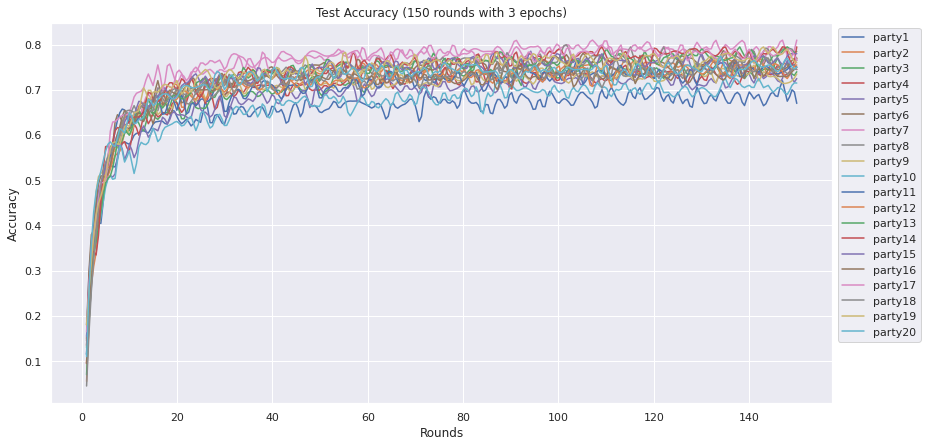

In [6]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Rounds')
# plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_accuracy.png', dpi=200)
plt.show()

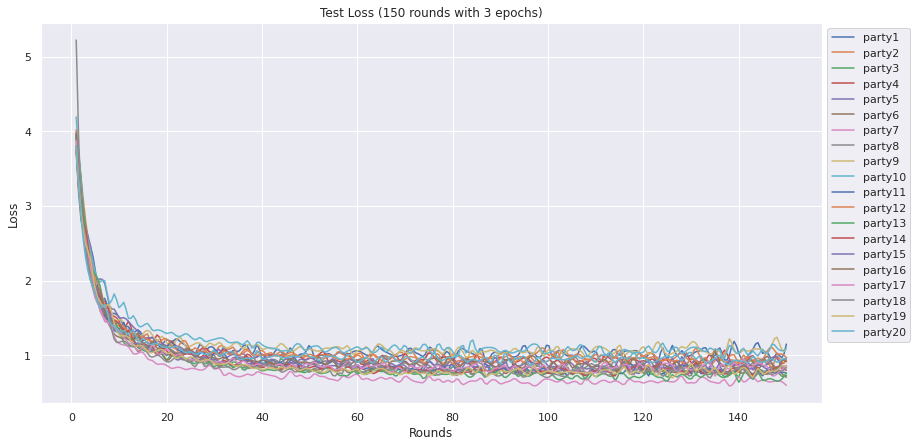

In [7]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Rounds')
# plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_loss.png', dpi=200)
plt.show()

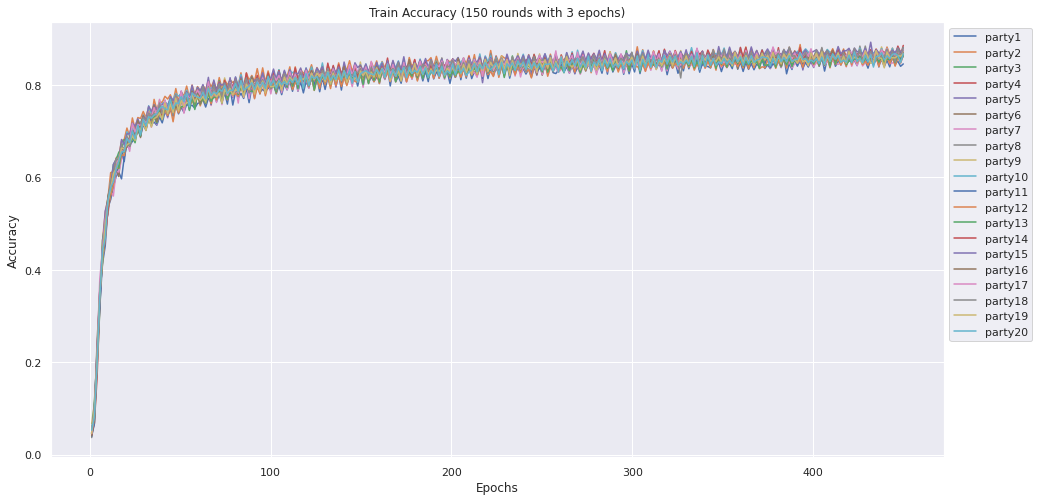

In [8]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_accuracy.png', dpi=200)
plt.show()

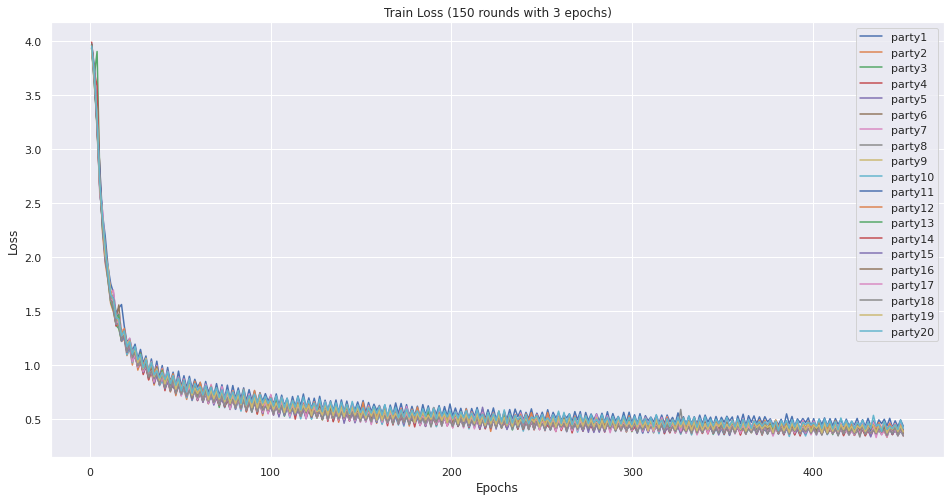

In [9]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_loss.png', dpi=200)
plt.show()

In [10]:
aggregator.model_synch()

2021-06-11T18:15:14.372Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating global model sync requests.
2021-06-11T18:15:14.374Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Sync Global Model<ibmfl.model.model_update.ModelUpdate object at 0x7f5b7422a908>
2021-06-11T18:15:14.375Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T18:15:15.767Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T18:15:15.768Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T18:15:15.769Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T18:15:15.769Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished sync model requests


In [11]:
aggregator.eval_model()

2021-06-11T18:15:15.775Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating evaluation requests.
2021-06-11T18:15:15.776Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T18:15:17.193Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T18:15:17.193Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T18:15:17.194Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T18:15:17.194Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished evaluate model requests.
2021-06-11T18:15:17.195Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished eval requests


In [12]:
aggregator.save_model()

2021-06-11T18:15:17.199Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating save model request.
2021-06-11T18:15:17.201Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-11T18:15:20.216Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-11T18:15:20.216Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-11T18:15:20.217Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-11T18:15:20.217Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished saving the models.
2021-06-11T18:15:20.218Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished save requests
